In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
import warnings as w
w.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from mlxtend.plotting import plot_learning_curves


In [89]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("gender_submission.csv")

In [90]:
train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
def summary(data):  # function to understand data
    print('Shape of the data : ' ,data.shape)
    return( pd.DataFrame({ 'Dtypes':data.dtypes , 
                            'NAs' : data.isnull().sum(),
                            'Uniques': data.nunique(),
                            "levels":[data[x].unique() for x in data.columns]}))

In [93]:
summary(train)

Shape of the data :  (891, 12)


,Dtypes,NAs,Uniques,levels
PassengerId,int64,0,891,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Survived,int64,0,2,"[0, 1]"
Pclass,int64,0,3,"[3, 1, 2]"
Name,object,0,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
Sex,object,0,2,"[male, female]"
Age,float64,177,88,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
SibSp,int64,0,7,"[1, 0, 3, 4, 2, 5, 8]"
Parch,int64,0,7,"[0, 1, 2, 5, 3, 4, 6]"
Ticket,object,0,681,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
Fare,float64,0,248,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."


In [94]:
summary(test)

Shape of the data :  (418, 11)


,Dtypes,NAs,Uniques,levels
PassengerId,int64,0,418,"[892, 893, 894, 895, 896, 897, 898, 899, 900, ..."
Pclass,int64,0,3,"[3, 2, 1]"
Name,object,0,418,"[Kelly, Mr. James, Wilkes, Mrs. James (Ellen N..."
Sex,object,0,2,"[male, female]"
Age,float64,86,79,"[34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26...."
SibSp,int64,0,7,"[0, 1, 2, 3, 4, 5, 8]"
Parch,int64,0,8,"[0, 1, 3, 2, 4, 6, 5, 9]"
Ticket,object,0,363,"[330911, 363272, 240276, 315154, 3101298, 7538..."
Fare,float64,1,169,"[7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, ..."
Cabin,object,327,76,"[nan, B45, E31, B57 B59 B63 B66, B36, A21, C78..."


In [95]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
# we dont use name and Ticket columns. So, we can drop those columns.
train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [98]:
test.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [99]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [101]:
#handling the missing data in train and test
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [102]:
test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [103]:
#Cabin contains 80% missing data.So, we are drop the column from train and test.
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [104]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [105]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [106]:
test['Age']=test['Age'].fillna(train['Age'].mean())

In [107]:
test['Fare']=test['Fare'].fillna(train['Fare'].mean())

In [108]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [109]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [110]:
summary(train)

Shape of the data :  (891, 8)


,Dtypes,NAs,Uniques,levels
Survived,int64,0,2,"[0, 1]"
Pclass,int64,0,3,"[3, 1, 2]"
Sex,object,0,2,"[male, female]"
Age,float64,0,89,"[22.0, 38.0, 26.0, 35.0, 29.69911764705882, 54..."
SibSp,int64,0,7,"[1, 0, 3, 4, 2, 5, 8]"
Parch,int64,0,7,"[0, 1, 2, 5, 3, 4, 6]"
Fare,float64,0,248,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."
Embarked,object,0,3,"[S, C, Q]"


In [111]:
#label encoding the attributes i.e converting categorical to numerical attributes
label = preprocessing.LabelEncoder()

In [112]:
#col_obj = []
#for x in train.columns:
#    if train[x].dtype==object:
#        col_obj.append(x)
#print(col_obj)

In [113]:
for i in ['Sex','Embarked']:
    train[i] = label.fit_transform(train[i])
    test[i] = label.fit_transform(test[i])

In [114]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [115]:
#feature generation
train["family_size"]=train["SibSp"]+train["Parch"]+1
test["family_size"]=test["SibSp"]+test["Parch"]+1

In [116]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2


In [117]:
train.drop(["SibSp","Parch"],axis=1,inplace=True)
test.drop(["SibSp","Parch"],axis=1,inplace=True)

In [118]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2


In [119]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [121]:
def model_building(model):
    m=model
    m.fit(xtrain,ytrain)
    train_pred = m.predict(xtrain)
    test_pred = m.predict(xtest)
    print('=======Train======')
    print('Confusion Matrix: \n', confusion_matrix(ytrain,train_pred))
    print('Accuracy Score: ',accuracy_score(ytrain,train_pred))
    print('======Test======')
    print('Confusion Matrix: \n', confusion_matrix(ytest,test_pred))
    print('Accuracy Score: ', accuracy_score(ytest,test_pred))
    return m

In [122]:
lr1 = model_building(LogisticRegression())

=======Train======
Confusion Matrix: 
 [[370  62]
 [ 82 198]]
Accuracy Score:  0.797752808988764
======Test======
Confusion Matrix: 
 [[101  16]
 [ 16  46]]
Accuracy Score:  0.8212290502793296


In [123]:
pred1=lr1.predict(test)

In [126]:
sub.head(1)

,PassengerId,Survived
0,892,0


In [127]:
sub['Survived']=pred1

In [129]:
sub.to_csv("pred2.csv",index=False)

In [130]:
dt1 = model_building(DecisionTreeClassifier())

=======Train======
Confusion Matrix: 
 [[430   2]
 [ 11 269]]
Accuracy Score:  0.9817415730337079
======Test======
Confusion Matrix: 
 [[102  15]
 [ 17  45]]
Accuracy Score:  0.8212290502793296


In [131]:
rf1 = model_building(RandomForestClassifier())

=======Train======
Confusion Matrix: 
 [[428   4]
 [  9 271]]
Accuracy Score:  0.9817415730337079
======Test======
Confusion Matrix: 
 [[99 18]
 [12 50]]
Accuracy Score:  0.8324022346368715


In [133]:
pred3=rf1.predict(test)
sub['Survived']=pred3

In [134]:
sub.to_csv("pred3.csv",index=False)

In [132]:
xgb1 =model_building(XGBClassifier())

=======Train======
Confusion Matrix: 
 [[393  39]
 [ 55 225]]
Accuracy Score:  0.8679775280898876
======Test======
Confusion Matrix: 
 [[106  11]
 [ 13  49]]
Accuracy Score:  0.8659217877094972


In [135]:
pred4=xgb1.predict(test)

In [136]:
sub["Survived"]=pred4

In [137]:
sub.to_csv("pred4.csv",index=False)

In [62]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,6,8,10,12],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [1, 2, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}
rf2 = model_building(GridSearchCV(RandomForestClassifier() , param_grid = param_grid , cv=3 , n_jobs=-1,verbose = 2) )

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 17.6min finished


=======Train======
Confusion Matrix:  [[408  25]
 [ 79 200]]
Accuracy Score:  0.8539325842696629
======Test======
Confusion Matrix:  [[108   8]
 [ 25  38]]
Accuracy Score:  0.8156424581005587


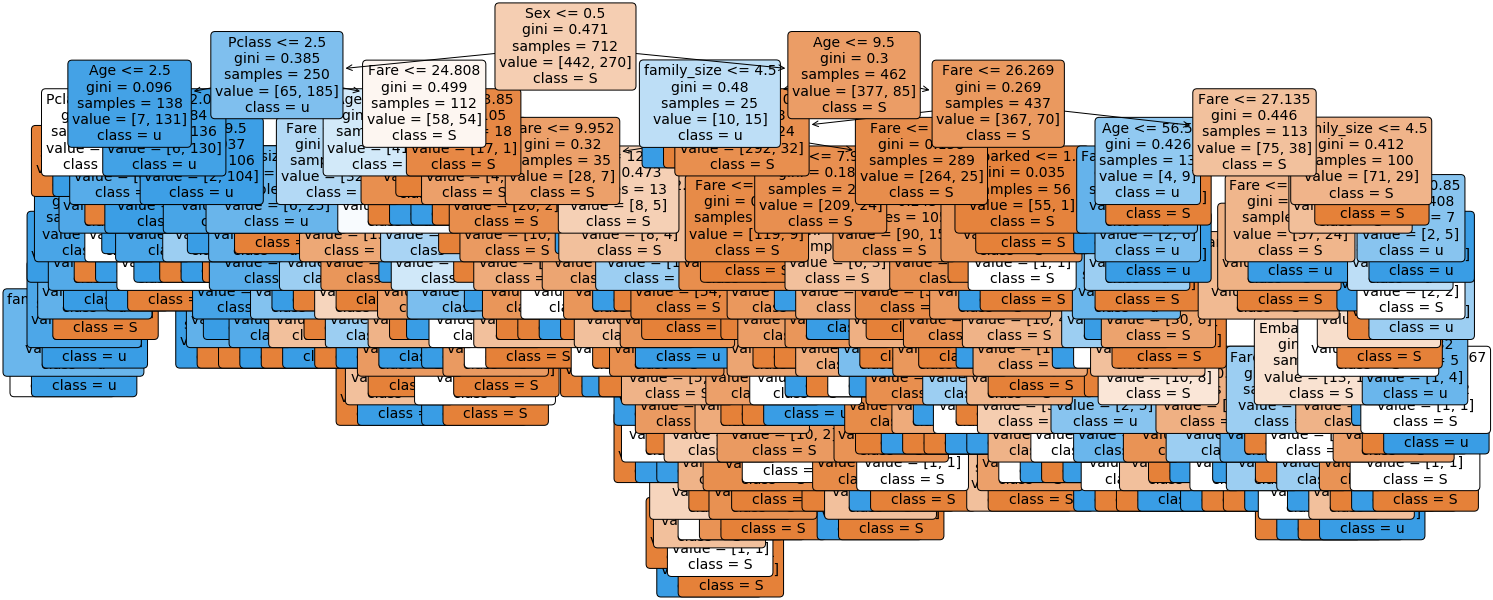

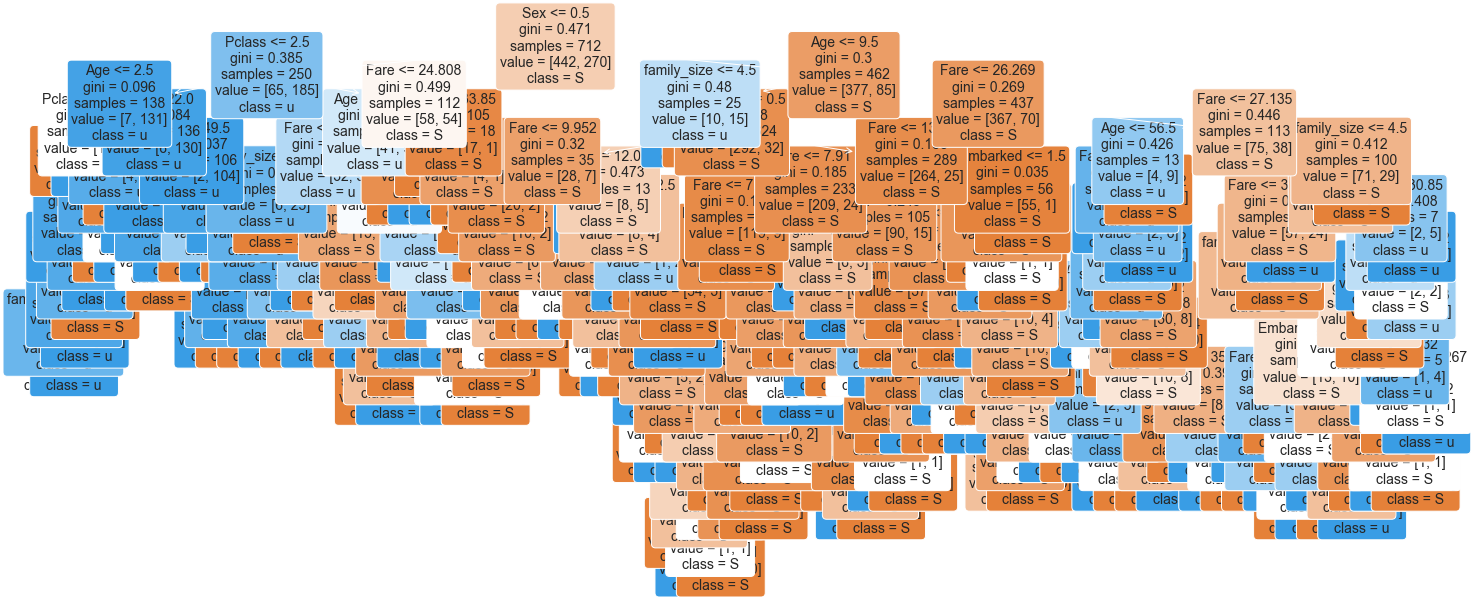

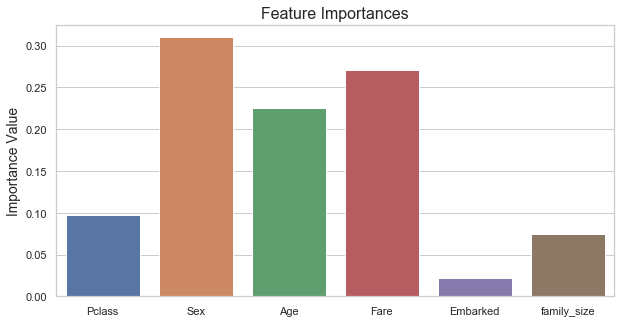

In [60]:
import seaborn as sns
from sklearn.tree import plot_tree
def GetFeatureImp(Model,x,y,DecisionTree = True):
    if DecisionTree:
        plt.figure(figsize=(25,10))
        a = plot_tree(Model,
                      feature_names=x.columns, 
                      class_names=y.name,
                      filled=True, 
                      rounded=True, 
                      fontsize=14)
    ImpValues = Model.feature_importances_
    name = x.columns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,5))
    sns.barplot(x=name, y=ImpValues)
    plt.title('Feature Importances',fontsize=16)
    b = plt.ylabel('Importance Value',fontsize=14)
    
GetFeatureImp(dt1,x,y)


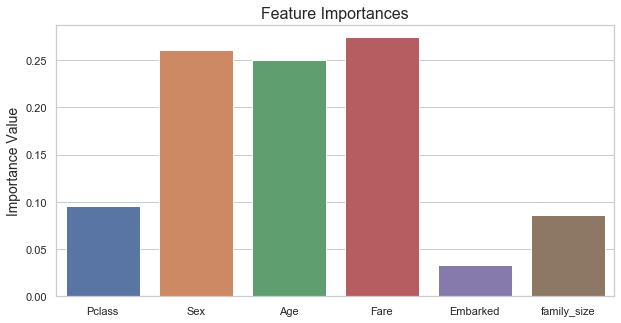

In [63]:
GetFeatureImp(rf1,x,y,False)